In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from datetime import datetime as dt
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("merchants.csv")

In [5]:
df1.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [4]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
df1 = reduce_mem_usage(df1)

Mem. usage decreased to 30.32 Mb (46.0% reduction)


In [7]:
df1.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


 # **subsector_id, merchant_category_id**


In [14]:
len(df1["subsector_id"].value_counts()), len(df1["merchant_category_id"].value_counts()), len(df1["merchant_group_id"].value_counts())

(41, 324, 109391)

In [20]:
a = df1["subsector_id"].unique()
a.sort()
a

array([-1,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41])

In [22]:
b = df1["merchant_category_id"].unique()
b.sort()
b

array([ -1,   2,   9,  11,  14,  16,  18,  19,  21,  31,  33,  34,  36,
        38,  40,  45,  49,  52,  53,  56,  57,  59,  60,  63,  67,  68,
        69,  71,  78,  80,  81,  83,  86,  87,  90, 101, 105, 108, 109,
       110, 111, 114, 115, 117, 119, 126, 130, 131, 140, 141, 145, 153,
       154, 157, 162, 164, 166, 171, 172, 178, 179, 180, 181, 182, 183,
       184, 187, 190, 195, 198, 201, 206, 209, 210, 215, 216, 217, 222,
       223, 224, 225, 226, 241, 245, 246, 247, 248, 249, 259, 260, 261,
       265, 266, 267, 268, 273, 274, 276, 278, 281, 289, 290, 292, 298,
       299, 302, 307, 309, 312, 315, 317, 319, 320, 322, 330, 332, 333,
       334, 340, 342, 343, 345, 348, 351, 355, 356, 357, 358, 360, 363,
       367, 369, 373, 374, 381, 383, 384, 385, 386, 387, 391, 393, 396,
       398, 400, 401, 409, 411, 412, 414, 415, 416, 417, 419, 420, 421,
       422, 427, 430, 432, 434, 436, 437, 438, 443, 448, 451, 454, 456,
       457, 458, 462, 464, 469, 471, 472, 474, 478, 480, 482, 48

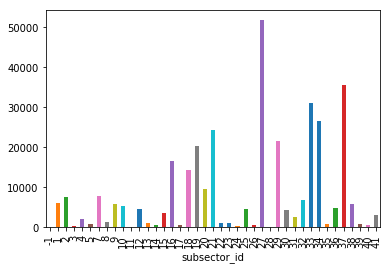

In [11]:
df1.groupby("subsector_id").size().plot(kind = "bar")

In [4]:
pd.crosstab( df1["subsector_id"], df1["merchant_category_id"]).head()

merchant_category_id,-1,2,9,11,14,16,18,19,21,31,...,854,873,875,878,879,881,884,885,889,891
subsector_id,,,,,,,,,,,,,,,,,,,,,
-1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mcl = df1["merchant_category_id"].unique()
dic2 = {}
for i in mcl:
    dic2[i] = len(df1[df1["merchant_category_id"]==i].groupby("subsector_id").size())
print(dic2)

# merchant_category_id는 1개의 subsector_id에 대응
#subsector_id를 기준으로 merchant_category_id를 그루핑 할 수 있음

{792: 1, 840: 1, 690: 1, 222: 1, 87: 1, 529: 1, 813: 1, 81: 1, 369: 1, 427: 1, 63: 1, 45: 1, 2: 1, 278: 1, 298: 1, 497: 1, 309: 1, 705: 1, 511: 1, 437: 1, 456: 1, 781: 1, 703: 1, 360: 1, 796: 1, 412: 1, 332: 1, 80: 1, 630: 1, 68: 1, 591: 1, 606: 1, 683: 1, 891: 1, 560: 1, 178: 1, 290: 1, 544: 1, 823: 1, 692: 1, 779: 1, 33: 1, 432: 1, 818: 1, 819: 1, 842: 1, 411: 1, 19: 1, 771: 1, 34: 1, 419: 1, 884: 1, 184: 1, 111: 1, 434: 1, 356: 1, 367: 1, 373: 1, 631: 1, 573: 1, 652: 1, 669: 1, 531: 1, 195: 1, 130: 1, 836: 1, 637: 1, 670: 1, 307: 1, 215: 1, 387: 1, 506: 1, 443: 1, 774: 1, 414: 1, 166: 1, 108: 1, 607: 1, 451: 1, 763: 1, 806: 1, 471: 1, 518: 1, 105: 1, 60: 1, 391: 1, 557: 1, 302: 1, 154: 1, 623: 1, 333: 1, 847: 1, 384: 1, 78: 1, 299: 1, 342: 1, 363: 1, 101: 1, 783: 1, 90: 1, 489: 1, 737: 1, 650: 1, 261: 1, 556: 1, 209: 1, 454: 1, 462: 1, 9: 1, 769: 1, 561: 1, 661: 1, 289: 1, 474: 1, 180: 1, 259: 1, 14: 1, 40: 1, 317: 1, 273: 1, 115: 1, 507: 1, 667: 1, 216: 1, 498: 1, 422: 1, 206: 1, 6

In [6]:
len(df1[df1["merchant_category_id"]==829].groupby("subsector_id").size())

1

In [23]:
def categorize(df, inputcol, outputcol):
    mcl = df[inputcol].unique()
    dic2 = {}
    for i in mcl:
        dic2[i] = len(df[df[inputcol]==i].groupby(outputcol).size())
    return dic2
#     if dic2.values()

In [27]:
categorize(df1,"merchant_category_id", "subsector_id").values()
# merchant_category_id는 1개의 subsector_id에 대응
#subsector_id를 기준으로 merchant_category_id를 그루핑 할 수 있음

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
def categorize2(df, inputcol, outputcol):
    dic1 ={}

    for i in range(len(df)):
        key = df[outputcol][i]
        val = df[inputcol][i]
        if key in dic1:
            dic1[key].add(val)
        else: 
            dic1[key] =set([val])
            
    return dic1

In [31]:
temp = categorize2(df1, "merchant_category_id", "subsector_id")

In [35]:
df2 = pd.DataFrame()
df2["merchant_category_id"] = temp.keys()
df2["subsector_id"] = temp.values()
df2

,merchant_category_id,subsector_id
0,9,"{225, 514, 806, 556, 685, 340, 792}"
1,20,"{2, 69, 840, 458, 714, 396, 529, 273, 180, 342..."
2,1,"{690, 419, 829, 206}"
3,21,"{356, 71, 456, 9, 40, 201, 140, 115, 692, 309,..."
4,27,"{289, 834, 417, 68, 357, 518, 422, 319, 427, 7..."
5,29,"{386, 774, 650, 523, 145, 21, 664, 409, 795, 1..."
6,18,"{737, 482, 363, 45, 373, 412, 669, 415}"
7,37,"{637, 842, 80, 278, 509}"
8,10,"{198, 298, 333, 119, 796}"
9,33,"{705, 642, 613}"


In [38]:
cate_mgroup = categorize(df1, "merchant_group_id", "subsector_id")

In [39]:
cate_mgroup.values()
#merchant_group_id는 subsector_id에 대해 카테고라이징되지 않음

dict_values([4, 8, 2, 4, 6, 1, 1, 2, 2, 1, 2, 1, 3, 8, 2, 5, 4, 3, 2, 2, 3, 3, 5, 40, 1, 3, 5, 4, 2, 3, 1, 7, 2, 1, 3, 2, 2, 4, 4, 8, 5, 2, 5, 1, 3, 4, 2, 1, 1, 5, 2, 1, 3, 2, 3, 1, 6, 1, 3, 2, 2, 2, 1, 4, 3, 9, 2, 4, 1, 1, 2, 3, 2, 5, 1, 1, 2, 3, 1, 5, 2, 1, 4, 2, 2, 2, 2, 5, 2, 2, 2, 2, 7, 2, 4, 1, 2, 3, 2, 2, 1, 6, 3, 1, 1, 14, 4, 4, 4, 1, 1, 2, 8, 1, 2, 9, 3, 6, 2, 2, 3, 5, 5, 1, 3, 2, 9, 3, 7, 2, 2, 7, 2, 4, 4, 2, 2, 1, 2, 6, 2, 2, 2, 1, 1, 1, 2, 2, 1, 4, 4, 2, 2, 8, 3, 3, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 3, 4, 2, 3, 1, 11, 3, 3, 1, 3, 4, 4, 3, 4, 1, 3, 1, 1, 1, 3, 2, 4, 3, 8, 2, 5, 4, 2, 1, 5, 1, 3, 4, 4, 1, 3, 7, 4, 2, 1, 5, 1, 2, 2, 1, 2, 1, 1, 1, 4, 1, 1, 2, 7, 1, 4, 1, 1, 1, 4, 4, 3, 1, 6, 1, 2, 2, 1, 6, 1, 1, 1, 3, 3, 1, 1, 5, 1, 1, 2, 2, 4, 4, 1, 4, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 3, 5, 10, 2, 5, 1, 2, 2, 12, 3, 1, 2, 2, 2, 4, 3, 3, 1, 2, 3, 1, 1, 3, 1, 4, 2, 1, 1, 1, 2, 5, 7, 1, 5, 3, 2, 5, 2, 3, 9, 2, 2, 1, 2, 6, 2, 3, 2, 6, 7, 1, 4, 6, 2, 2, 1, 2, 1, 1, 4, 7, 4, 1, 2, 5, 4, 2

# **numerical1, 2** -->선형관계

In [44]:
np.mean(df1["numerical_1"]), np.std(df1["numerical_1"]), max(df1["numerical_1"]), min(df1["numerical_1"])

(0.01148, 0.0, 183.75, -0.057464599609375)

In [45]:
np.mean(df1["numerical_2"]), np.std(df1["numerical_2"]), max(df1["numerical_2"]), min(df1["numerical_2"])

(0.008095, 0.0, 182.125, -0.057464599609375)

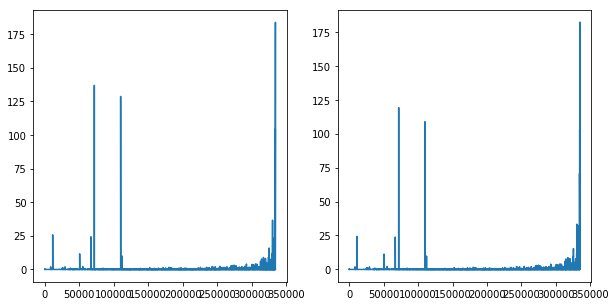

In [40]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df1["numerical_1"].plot()
plt.subplot(1, 2, 2)
df1["numerical_2"].plot()

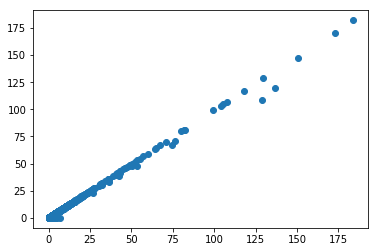

In [41]:
plt.scatter(df1["numerical_1"], df1["numerical_2"])
# plt.plot(df1["numerical_2"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab660a7b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab66093208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab660a79e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab66093898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab66093be0>],
 'means': []}

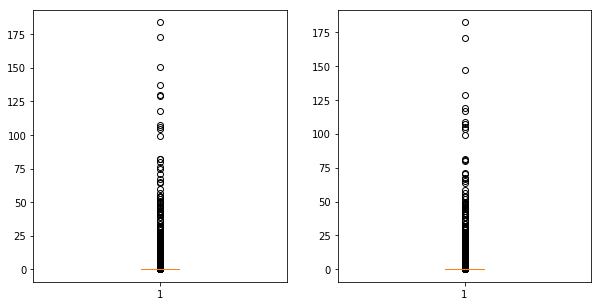

In [42]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df1["numerical_1"])
plt.subplot(1, 2, 2)
plt.boxplot(df1["numerical_2"])

## 카테고리1

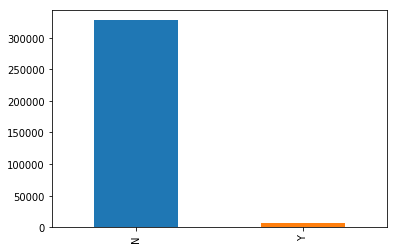

In [46]:
cat1 = df1["category_1"].value_counts()
cat1 = cat1.sort_index()
cat1.plot(kind = "bar")

## most_recent_sales_range, most_recent_purchases_range

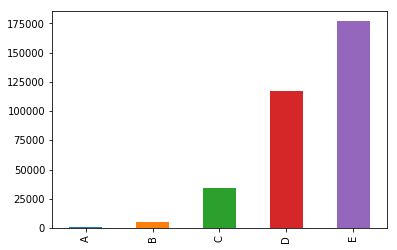

In [47]:
sales = df1["most_recent_sales_range"].value_counts()
sales = sales.sort_index()
sales.plot(kind = "bar")

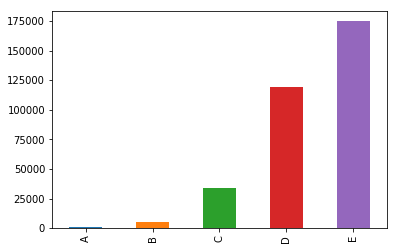

In [48]:
mpur = df1["most_recent_purchases_range"].value_counts()
mpur = mpur.sort_index()
mpur.plot(kind = "bar")

## avg_sales_lag, avg_purchases_lag, active_months_lag

### lag3

(-100, 1000)

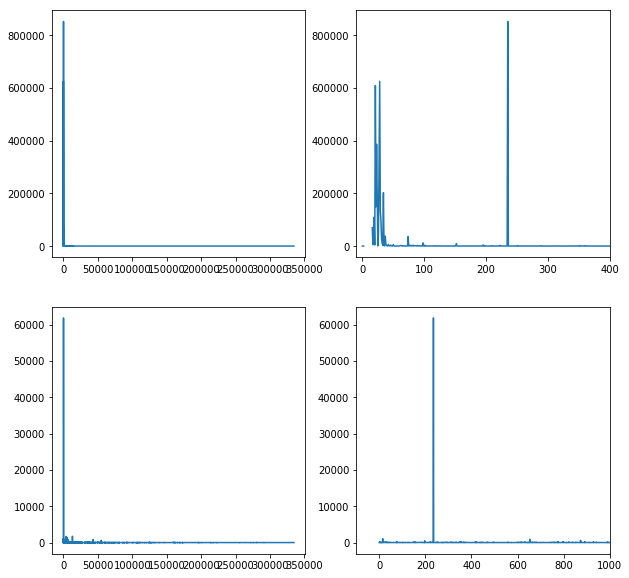

In [42]:
plt.figure(figsize= (10, 10))

plt.subplot(2, 2, 1)
df1["avg_sales_lag3"].plot()

plt.subplot(2, 2, 2)
df1["avg_sales_lag3"].plot()
plt.xlim(-10, 400)

plt.subplot(2, 2, 3)
df1["avg_purchases_lag3"].plot()

plt.subplot(2, 2, 4)
df1["avg_purchases_lag3"].plot()
plt.xlim(-100, 1000)

(-100, 50000)

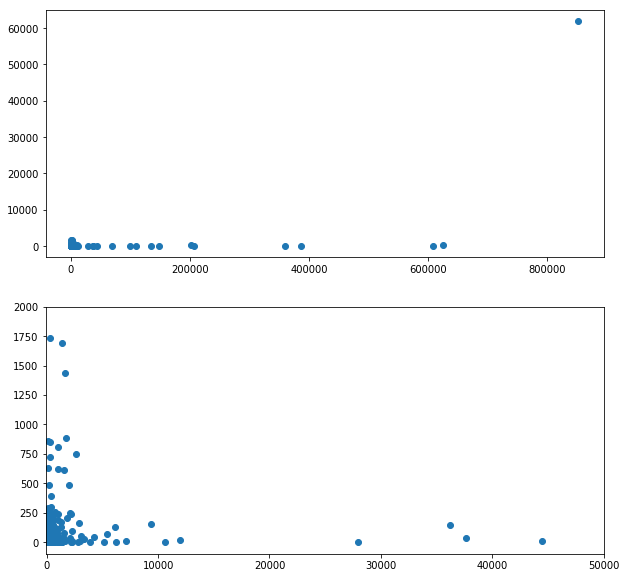

In [68]:
plt.figure(figsize= (10, 10))

plt.subplot(2, 1, 1)
plt.scatter(df1["avg_sales_lag3"], df1["avg_purchases_lag3"])

plt.subplot(2, 1, 2)
plt.scatter(df1["avg_sales_lag3"], df1["avg_purchases_lag3"])
plt.ylim(-100, 2000)
plt.xlim(-100, 50000)

### lag6

(-100, 10000)

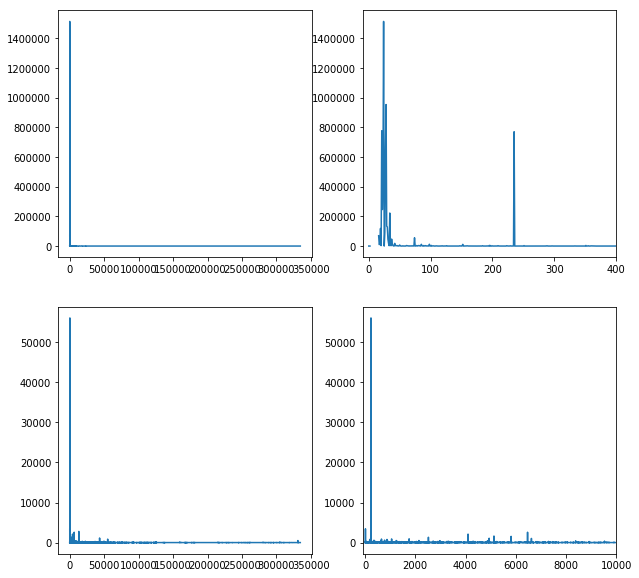

In [51]:
plt.figure(figsize= (10, 10))

plt.subplot(2, 2, 1)
df1["avg_sales_lag6"].plot()

plt.subplot(2, 2, 2)
df1["avg_sales_lag6"].plot()
plt.xlim(-10, 400)

plt.subplot(2, 2, 3)
df1["avg_purchases_lag6"].plot()

plt.subplot(2, 2, 4)
df1["avg_purchases_lag6"].plot()
plt.xlim(-100, 10000)

(-10000, 150000)

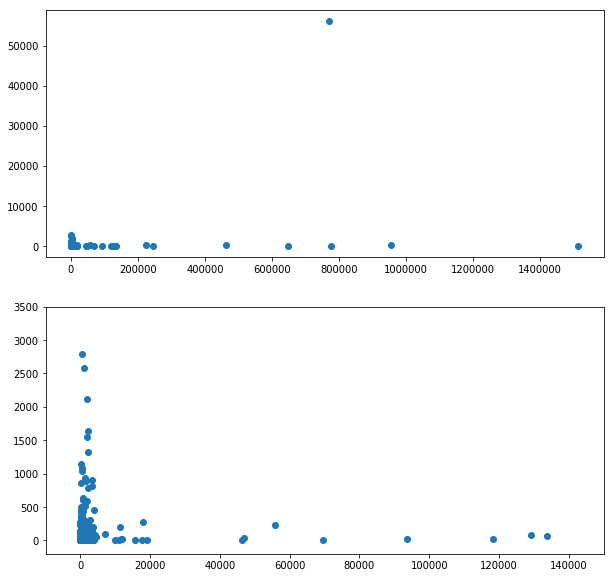

In [64]:
plt.figure(figsize= (10, 10))

plt.subplot(2, 1, 1)
plt.scatter(df1["avg_sales_lag6"], df1["avg_purchases_lag6"])

plt.subplot(2, 1, 2)
plt.scatter(df1["avg_sales_lag6"], df1["avg_purchases_lag6"])
plt.ylim(-200, 3500)
plt.xlim(-10000, 150000)

### lag12

(-120, 10000)

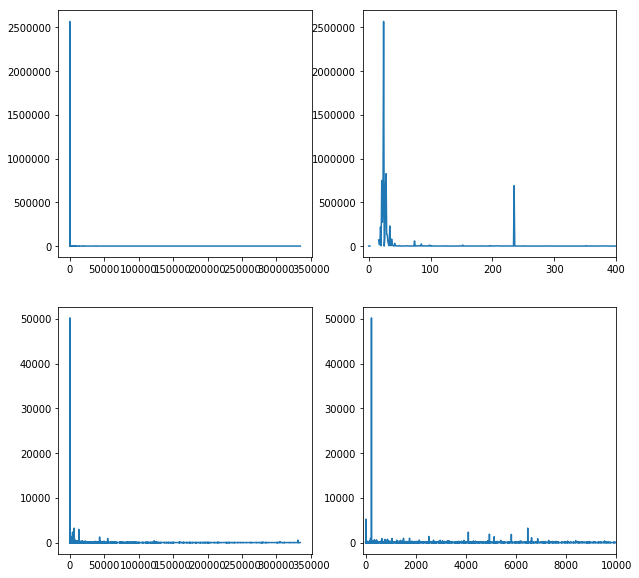

In [54]:
plt.figure(figsize= (10, 10))

plt.subplot(2, 2, 1)
df1["avg_sales_lag12"].plot()

plt.subplot(2, 2, 2)
df1["avg_sales_lag12"].plot()
plt.xlim(-10, 400)

plt.subplot(2, 2, 3)
df1["avg_purchases_lag12"].plot()

plt.subplot(2, 2, 4)
df1["avg_purchases_lag12"].plot()
plt.xlim(-120, 10000)

(-10000, 150000)

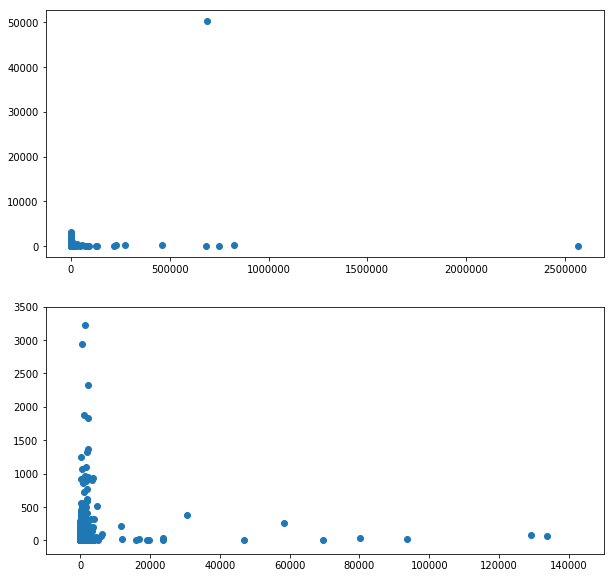

In [69]:
plt.figure(figsize= (10, 10))

plt.subplot(2, 1, 1)
plt.scatter(df1["avg_sales_lag12"], df1["avg_purchases_lag12"])

plt.subplot(2, 1, 2)
plt.scatter(df1["avg_sales_lag12"], df1["avg_purchases_lag12"])
plt.ylim(-200, 3500)
plt.xlim(-10000, 150000)

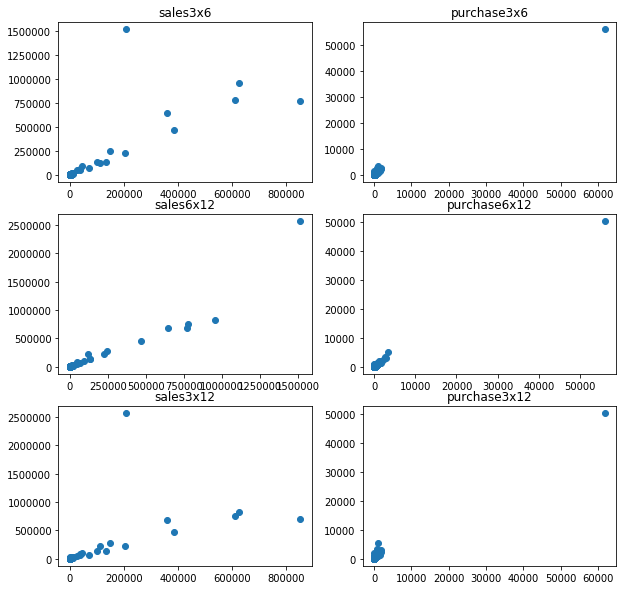

In [6]:
plt.figure(figsize= (10, 10))

plt.subplot(3, 2, 1)
plt.title("sales3x6")
plt.scatter(df1["avg_sales_lag3"], df1["avg_sales_lag6"])

plt.subplot(3, 2, 2)
plt.title("purchase3x6")
plt.scatter(df1["avg_purchases_lag3"], df1["avg_purchases_lag6"])

plt.subplot(3, 2, 3)
plt.title("sales6x12")
plt.scatter(df1["avg_sales_lag6"], df1["avg_sales_lag12"])



plt.subplot(3, 2,4)
plt.title("purchase6x12")
plt.scatter(df1["avg_purchases_lag6"], df1["avg_purchases_lag12"])

plt.subplot(3, 2, 5)

plt.title("sales3x12")
plt.scatter(df1["avg_sales_lag3"], df1["avg_sales_lag12"])

plt.subplot(3, 2, 6)
plt.title("purchase3x12")
plt.scatter(df1["avg_purchases_lag3"], df1["avg_purchases_lag12"])



(-100, 6000)

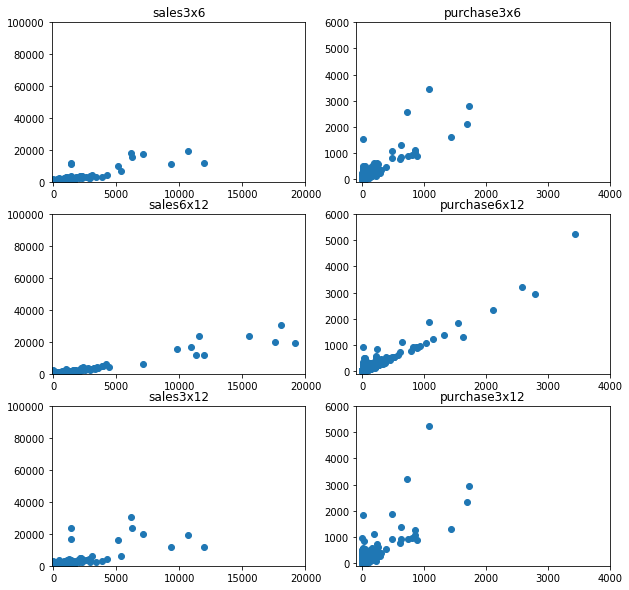

In [8]:
plt.figure(figsize= (10, 10))

plt.subplot(3, 2, 1)
plt.title("sales3x6")
plt.scatter(df1["avg_sales_lag3"], df1["avg_sales_lag6"])
plt.xlim(-100, 20000)
plt.ylim(-100, 100000)

plt.subplot(3, 2, 2)
plt.title("purchase3x6")
plt.scatter(df1["avg_purchases_lag3"], df1["avg_purchases_lag6"])
plt.xlim(-100, 4000)
plt.ylim(-100, 6000)

plt.subplot(3, 2, 3)
plt.title("sales6x12")
plt.scatter(df1["avg_sales_lag6"], df1["avg_sales_lag12"])
plt.xlim(-100, 20000)
plt.ylim(-100, 100000)

plt.subplot(3, 2,4)
plt.title("purchase6x12")
plt.scatter(df1["avg_purchases_lag6"], df1["avg_purchases_lag12"])
plt.xlim(-100, 4000)
plt.ylim(-100, 6000)

plt.subplot(3, 2, 5)

plt.title("sales3x12")
plt.scatter(df1["avg_sales_lag3"], df1["avg_sales_lag12"])
plt.xlim(-100, 20000)
plt.ylim(-100, 100000)

plt.subplot(3, 2, 6)
plt.title("purchase3x12")
plt.scatter(df1["avg_purchases_lag3"], df1["avg_purchases_lag12"])
plt.xlim(-100, 4000)
plt.ylim(-100, 6000)

In [10]:
cort = df1.corr()

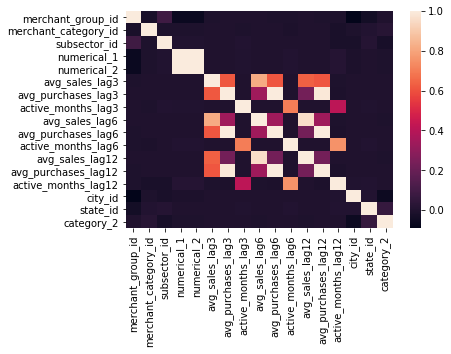

In [11]:
sns.heatmap(cort)
plt.show()

## category4

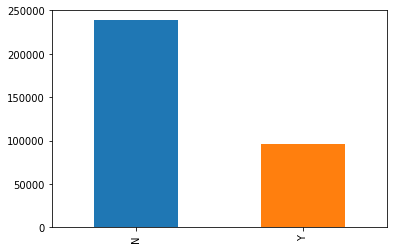

In [15]:
df1["category_4"].value_counts().plot(kind = "bar")

In [23]:
a = df1["city_id"].unique()
a.sort()
a

array([ -1,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  16,  17,  18,  21,  22,  23,  24,  25,  26,  28,  29,  30,
        32,  33,  34,  35,  36,  38,  39,  40,  41,  42,  44,  46,  47,
        48,  49,  51,  52,  53,  56,  58,  60,  61,  62,  63,  64,  65,
        66,  68,  69,  70,  71,  73,  74,  76,  77,  78,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  96,  97,
        98, 100, 101, 104, 105, 106, 108, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 123, 124, 125, 126, 128, 129, 130, 131,
       133, 135, 136, 137, 139, 140, 142, 143, 144, 145, 146, 147, 148,
       150, 151, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165,
       166, 167, 168, 169, 171, 172, 173, 174, 175, 178, 180, 181, 182,
       183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 198, 200, 201,
       203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       218, 219, 220, 221, 223, 224, 226, 228, 229, 230, 231, 23